<a href="https://colab.research.google.com/github/maximilianoPizarro/Machine-Learning/blob/master/Ejemplo_An%C3%A1lisis_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo comportamiento de métricas

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Creando un dataset de ejemplo manualmente

In [0]:
# creamos 2 variables (simuladas) para evaluar el rendimiento "de un modelo"
values = [
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 10},
]
df = pd.DataFrame()
df = df.append(values)
df.head()

,y,y_pred
0,10,10
1,10,11
2,10,9
3,10,10
4,10,11


## calculemos la diferencia simple (sin aplicar formulas)

In [0]:
# Sumatoria(real - pred)
# calculamos la diff por fila
print("Error: %f" % np.sum(df["y"] - df["y_pred"]))

Error: 0.000000


In [0]:
df["y"] - df["y_pred"]

0    0
1   -1
2    1
3    0
4   -1
5    1
6    0
dtype: int64

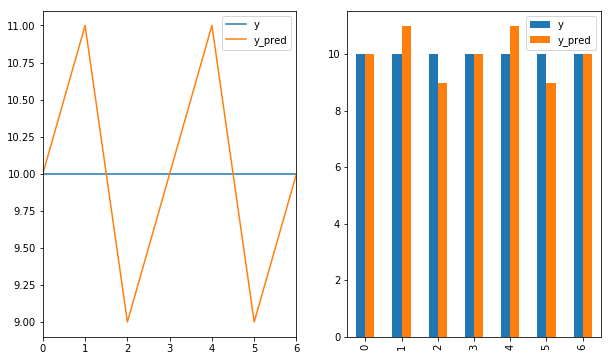

In [0]:
# miremos la distribución de las variables
# pandas nos prove de funciones simples de visualización super útiles!!
f, axes = plt.subplots(1, 2, figsize=(10,6))
# line plot default
df.plot(ax=axes[0])
df.plot.bar(ax=axes[1])

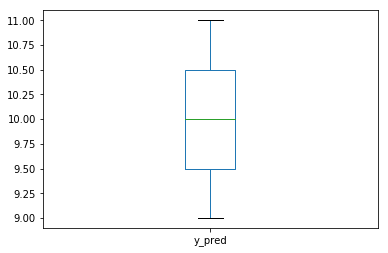

In [0]:
df["y_pred"].plot.box()

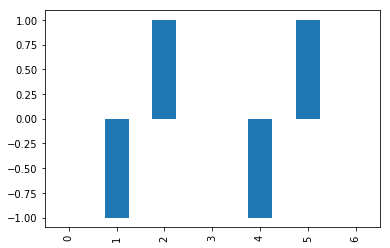

In [0]:
# diferencia por registro
(df["y"] - df["y_pred"]).plot.bar()

In [0]:
print("Error Suma de valores absolutos: %f" % np.sum(np.absolute(df["y"] - df["y_pred"])))

Error Suma de valores absolutos: 4.000000


##Aplicando fórmulas

In [0]:
#Veamos que pasa con las métricas para regresión
mae = mean_absolute_error(df["y"], df["y_pred"])
print("Error (mae): %f" % mae)

Error (mae): 0.571429


In [0]:
mse = mean_squared_error(df["y"], df["y_pred"])
print("Error (mse): %f" % mse)

Error (mse): 0.571429


In [0]:
# 
((df["y"] - df["y_pred"]) ** 2).sum() / len(df)

0.5714285714285714

**mismo valor de error.** <br>

0.57 de error. ¿Eso es bueno o malo?<br>
***les propongo que investiguemos como se calcula ese valor!***

### Nuevo caso

In [0]:
values = [
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 8},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 12},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
]
df = pd.DataFrame()
df = df.append(values)
df.head()

,y,y_pred
0,10,10
1,10,10
2,10,8
3,10,10
4,10,12


##Diferencia simple

In [0]:
# calculamos la diff por fila
print("Error: %f" % np.sum(df["y"] - df["y_pred"]))
print("Error Suma de valores absolutos: %f" % np.sum(np.absolute(df["y"] - df["y_pred"])))

Error: 0.000000
Error Suma de valores absolutos: 4.000000


Mismos valores que en el caso anterior.

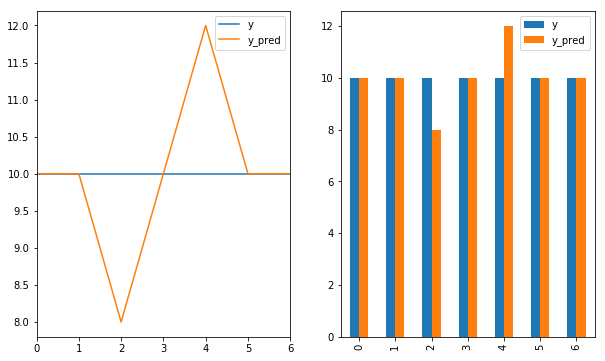

In [0]:
# miremos la distribución de las variables
# pandas nos prove de funciones simples de visualización super útiles!!
f, axes = plt.subplots(1, 2, figsize=(10,6))
# line plot default
df.plot(ax=axes[0])
df.plot.bar(ax=axes[1])

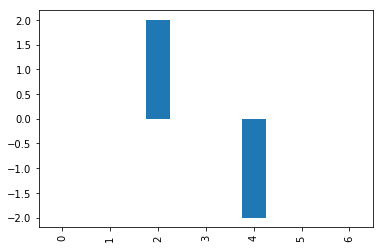

In [0]:
# diferencia por registro
(df["y"] - df["y_pred"]).plot.bar()

## Aplicando formulas

In [0]:
#Veamos que pasa con las métricas para regresión
mae = mean_absolute_error(df["y"], df["y_pred"])
print("Error (mae): %f" % mae)
# valor del primer ejemplo: Error (mae): 0.571429

Error (mae): 0.571429


**Mismo valor que en el caso anterior**
veamos MSE

In [0]:
mse = mean_squared_error(df["y"], df["y_pred"])
print("Error (mse): %f" % mse)
# valor del primer ejemplo: Error (mse): 0.571429

Error (mse): 1.142857


**El valor es casí el doble: 0.571429 => 1.142857**<br>
¿porque ocurre esto?

Text(0.5, 1.0, 'Función cuadrática')

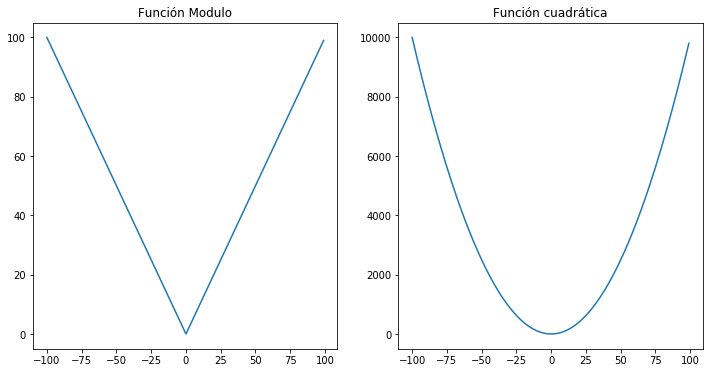

In [0]:
# vamos a crear 2 funciones juntas
f, axes = plt.subplots(1, 2, figsize=(12,6))  # (1 fila, 2 columnas)
# graficar función modulo
sns.lineplot(range(-100,100), [abs(i) for i in range(-100,100)], ax=axes[0]).set_title("Función Modulo")
# graficar función cuadrática
sns.lineplot(range(-100,100), [i ** 2 for i in range(-100,100)], ax=axes[1]).set_title("Función cuadrática")

**Cuidado:** Las escalas del eje Y (vertical) de las figuras son significativamente distintas.

**Reflexionemos:** ¿Cómo difieren los 2 casos previamente analizados?

##Por último, los invitamos a probar con nuevos casos

In [0]:
caso3 = [
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 11},
    {"y": 10,"y_pred": 9},
    {"y": 10,"y_pred": 10},
]
caso4 = [
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 10},
    {"y": 10,"y_pred": 14},
    {"y": 10,"y_pred": 14},
    {"y": 10,"y_pred": 10},
]

**¿Antes de empezar con el proceso, que creen que va a ocurrir?¿Como se comportarán las métricas?**

In [0]:
df1 = pd.DataFrame()
df1 = df1.append(caso3)
df1.head()

df2 = pd.DataFrame()
df2 = df2.append(caso4)
df2.head()


,y,y_pred
0,10,10
1,10,10
2,10,10
3,10,10
4,10,14


In [0]:
#Veamos que pasa con las métricas para regresión
mae = mean_absolute_error(df1["y"], df1["y_pred"])
print("Error (mae): %f" % mae)
# valor del primer ejemplo: Error (mae): 0.571429

Error (mae): 0.571429


In [0]:
#Veamos que pasa con las métricas para regresión
mae1 = mean_absolute_error(df2["y"], df2["y_pred"])
print("Error (mae): %f" % mae1)
# valor del primer ejemplo: Error (mae): 0.571429

Error (mae): 1.142857


In [0]:
mse = mean_squared_error(df1["y"], df1["y_pred"])
print("Error (mse): %f" % mse)
# valor del primer ejemplo: Error (mse): 0.571429

Error (mse): 0.571429


In [0]:
mse2 = mean_squared_error(df2["y"], df2["y_pred"])
print("Error (mse): %f" % mse2)
# valor del primer ejemplo: Error (mse): 0.571429

Error (mse): 4.571429


##Compute Area Under the Curve (AUC) 
---



In [0]:
import numpy as np
from sklearn.metrics import roc_curve,auc

Vamos a trabajar la metrica de computarizar el area debajo de la curva de Sklearn para eso vamos a crear  un dataset que va 
a contener la consentración de un valor predicho (y_pred) en funcion del tiempo (y).

In [0]:
caso_auc = [
    {"y": 0,"y_pred": 100},
    {"y": 1,"y_pred": 50},
    {"y": 2,"y_pred": 25},
    {"y": 3,"y_pred": 12.5},
    {"y": 4,"y_pred": 6.25},
    {"y": 5,"y_pred": 3.13},
    {"y": 6,"y_pred": 1.56}
]

In [0]:
dfauc = pd.DataFrame(caso_auc)
dfauc.head()

,y,y_pred
0,0,100.00
1,1,50.00
2,2,25.00
3,3,12.50
4,4,6.25


### Graficamos la  curva de la consentracion en funcion del tiempo

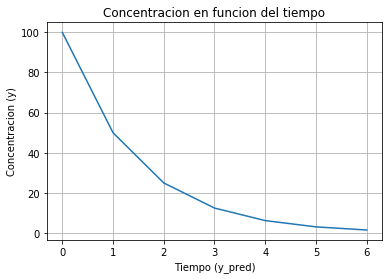

In [0]:

fig, ax = plt.subplots()
ax.plot(dfauc["y"], dfauc["y_pred"])

ax.set(xlabel='Tiempo (y_pred)', ylabel='Concentracion (y)',
       title='Concentracion en funcion del tiempo')
ax.grid()


### Extraemos falsos positivos, verdaderos positivos y umbrales con la funcion roc_curve

In [0]:
fpr, tpr, thresholds = roc_curve(dfauc["y"], dfauc["y_pred"], pos_label=2)

###Calculo del area debajo de la curva 

Analizaremos el metodo de Regla del trapecio para calcular el area debajo de la curva aunque existen otros meodos como 
regla de simpson.

>[Regla del Trapecio](https://es.wikipedia.org/wiki/Regla_del_trapecio)

>[Regla de Simpson](https://es.wikipedia.org/wiki/Regla_de_Simpson)





In [103]:
import numpy as np
from numpy import trapz

# Calculo del area debajo de la curva usando regla del trapecio.
area = trapz(dfauc['y_pred'], dfauc['y'])
print("Calculo del area usando regla del trapecio =", area)


Calculo del area usando regla del trapecio = 147.66


In [104]:
# Calculo del area debajo de la curva .
from scipy.integrate import simps

area = simps(dfauc['y_pred'], dfauc['y'])
print("Calculo del area usando composicion Simpson =", area)

Calculo del area usando composicion Simpson = 142.19333333333333


### Aplico la metrica AUC

In [0]:
auc(fpr, tpr)

0.6666666666666667

###Analizando otro caso

In [0]:
caso_auc_2 = [
    {"y": 0,"y_pred": 100},
    {"y": 1,"y_pred": 90},
    {"y": 2,"y_pred": 85},
    {"y": 3,"y_pred": 84},
    {"y": 4,"y_pred": 80.25},
    {"y": 5,"y_pred": 77.13},
    {"y": 6,"y_pred": 74.56},
    {"y": 7,"y_pred": 74.56},
    {"y": 8,"y_pred": 74.56},
    {"y": 9,"y_pred": 74.56},
    {"y": 10,"y_pred": 64.56},
    {"y": 11,"y_pred": 64.56},
    {"y": 12,"y_pred": 54.56}    
]

In [0]:
dfauc_otro = pd.DataFrame(caso_auc_2)


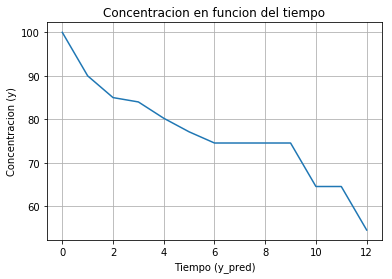

In [135]:
fig, ax = plt.subplots()
ax.plot(dfauc_otro["y"], dfauc_otro["y_pred"])

ax.set(xlabel='Tiempo (y_pred)', ylabel='Concentracion (y)',
       title='Concentracion en funcion del tiempo')
ax.grid()

In [0]:
fpr_otro, tpr_otro, thresholds = roc_curve(dfauc_otro["y"], dfauc_otro["y_pred"], pos_label=2)

In [137]:
auc(fpr_otro, tpr_otro)

0.8333333333333333

In [0]:
import os
import pandas as pd
import plotly.graph_objs as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv')
df["month"] = pd.DatetimeIndex(df["Date"]).month


In [143]:
df.describe()

,Unnamed: 0,Number-transactions,Output-volume(BTC),Market-price,Hash-rate,Cost-per-trans-USD,Mining-revenue-USD,Transaction-fees-BTC,month
count,179.000000,179.000000,1.790000e+02,1.790000e+02,1.790000e+02,179.000000,1.790000e+02,179.000000,179.000000
mean,89.000000,268576.463687,6.354816e+06,6.923937e+06,6.354816e+06,27.223464,6.923937e+06,272.234637,7.363128
std,51.816986,45980.026930,1.773494e+06,2.589169e+06,1.773494e+06,9.977802,2.589169e+06,129.560800,1.701613
min,0.000000,131875.000000,3.347227e+06,2.720216e+06,3.347227e+06,9.000000,2.720216e+06,13.000000,4.000000
25%,44.500000,233401.500000,4.939624e+06,5.176342e+06,4.939624e+06,20.500000,5.176342e+06,164.500000,6.000000
50%,89.000000,267360.000000,6.094384e+06,6.147322e+06,6.094384e+06,26.000000,6.147322e+06,247.000000,7.000000
75%,133.500000,297181.000000,7.569349e+06,8.410238e+06,7.569349e+06,35.000000,8.410238e+06,371.500000,9.000000
max,178.000000,369098.000000,1.160111e+07,1.421711e+07,1.160111e+07,52.000000,1.421711e+07,668.000000,10.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 10 columns):
Unnamed: 0              179 non-null int64
Date                    179 non-null object
Number-transactions     179 non-null int64
Output-volume(BTC)      179 non-null int64
Market-price            179 non-null int64
Hash-rate               179 non-null int64
Cost-per-trans-USD      179 non-null int64
Mining-revenue-USD      179 non-null int64
Transaction-fees-BTC    179 non-null int64
month                   179 non-null int64
dtypes: int64(9), object(1)
memory usage: 14.1+ KB


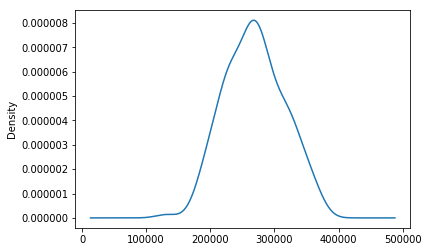

In [148]:
df['Number-transactions'].plot.kde()

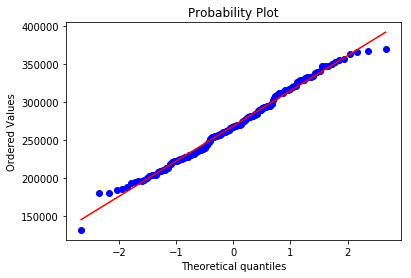

In [149]:
from scipy import stats #visualizar la distribución de probabilidades
#sirve para comprender si la variable en estudio tiene una distirbución normal
#necesaria para aplicar modelos paramétricos
stats.probplot(df['Number-transactions'], plot=plt)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
test_size = 0.3 # 30% de la población (usualmente se elige entre un 30 y un 15% según la cantidad de registros)
RANDOM_STATE = 42 #un valor aleatorio

In [0]:

X = df.drop(columns=['Number-transactions','Date'])
y = df["Number-transactions"] #variable target]
#X_names = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv')
#X_names

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)

In [0]:
from sklearn.linear_model import LinearRegression #importamos el modelo a utilizar

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

##Compute the balanced accuracy
---

In [0]:
from sklearn.metrics import balanced_accuracy_score

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

The best value is 1 and the worst value is 0 when adjusted=False.

In [0]:
caso_balanced_accuracy = [
    {"y_true": 0,"y_pred": 0},
    {"y_true": 1,"y_pred": 1},
    {"y_true": 0,"y_pred": 0},
    {"y_true": 0,"y_pred": 0},
    {"y_true": 1,"y_pred": 0},
    {"y_true": 0,"y_pred": 1}
]


In [0]:
df_balanced_accuracy = pd.DataFrame(caso_balanced_accuracy)
df_balanced_accuracy.head()

,y_pred,y_true
0,0,0
1,1,1
2,0,0
3,0,0
4,0,1


In [0]:
balanced_accuracy_score(df_balanced_accuracy["y_true"], df_balanced_accuracy["y_pred"])

0.625

In [179]:
y_pred

array([229372.16085808, 309650.2020637 , 270539.86474196, 232459.84241167,
       247515.32623332, 295469.71960204, 281592.44468093, 333248.03593386,
       272324.55242245, 267198.72943865, 296834.12199998, 270958.58798046,
       310215.27214526, 241262.75916853, 255265.2415904 , 325205.9663319 ,
       202326.13786635, 284412.65058679, 248113.51917667, 198563.23636316,
       208304.69647113, 307986.59501698, 320074.00363437, 221322.84150594,
       187998.14300862, 303720.15865877, 281925.31345544, 262983.84513776,
       225145.97288656, 269951.35443343, 247944.50573633, 289862.46313905,
       254050.68043168, 289371.91006517, 300498.5691708 , 195995.75745392,
       223877.28716426, 327976.66114538, 298805.85188585, 279865.55329545,
       296286.51945755, 178587.11224781, 237810.24572073, 246696.20505831,
       307014.87253477, 232064.52062634, 256868.44689799, 161998.34259848,
       181584.30487951, 300276.96205898, 283608.94228658, 141535.70601288,
       218482.66677176, 2